In [1]:
# We need to think of a better way to compute the forecasted values - the average

In [2]:
# What happense currently?

# We average out the predicted values before transformation, which is not the best thing to do, we need to first do the transformation - and then average things out, let's try computing the metrics this way

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [4]:
# We still need the true counts, so we need the nest few steps, let's leave things as they are

In [5]:
# path to dataframes
path_to_dfs = "suggestion_2/forecasted_counts/block_0304"

In [6]:
# os.listdir(path_to_dfs)

In [7]:
len(os.listdir(path_to_dfs))

6370

In [8]:
6370/910

7.0

In [9]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [10]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [11]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [12]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [13]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [14]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [15]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [16]:
# ordered_csv_files

In [17]:
# averaged_forecasts_csvs list is pointless at this time?

In [18]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 469 ms, sys: 12.5 ms, total: 481 ms
Wall time: 483 ms


In [19]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [20]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.002703,0.0,-0.002829,0.0,-0.001001,0.00000,0.000151,0.098687,0.038012,...,0.0,-0.002718,0.0,-0.006755,0.0,-0.013232,0.0,-0.001351,0.0,-0.003482
1,0.0,0.002043,0.0,-0.001222,0.0,-0.000579,0.00000,0.002955,0.000280,0.063581,...,0.0,0.002387,0.0,-0.003777,0.0,-0.008729,0.0,0.004238,0.0,-0.007090
2,0.0,0.001082,0.0,-0.003555,0.0,-0.002347,0.00000,-0.000998,0.017957,0.052403,...,0.0,-0.002744,0.0,-0.003949,0.0,-0.009027,0.0,0.002270,0.0,-0.007150
3,0.0,0.000249,0.0,-0.000455,0.0,-0.001475,0.00000,0.001307,0.000000,0.045380,...,0.0,0.006040,0.0,-0.003619,0.0,-0.006382,0.0,0.006045,0.0,-0.003304
4,0.0,-0.005938,0.0,-0.001162,0.0,-0.002396,0.00025,-0.000782,0.052774,0.064758,...,0.0,0.002649,0.0,-0.002108,0.0,-0.002284,0.0,0.005317,0.0,-0.000558


In [21]:
combined_df.shape

(7, 1820)

In [22]:
# get the true values
True_values_df = combined_df[['True_value']]

In [23]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.00000,0.098687,0.439687,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.000280,0.191231,0.00028,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,2.406495e-01,0.41786,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.017957,0.092096,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,4.513563e-07,0.033814,0.001271,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00025,0.052774,0.000018,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000020,0.002492,3.902047e-07,0.00000,0.0,0.0,0.0,0.0,0.0


In [24]:
True_values_df.shape

(7, 910)

In [25]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [26]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.000000e+00,0.103721,0.552221,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000e+00,0.000280,0.210739,0.00028,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,2.720751e-01,0.518708,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000e+00,0.018119,0.096470,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,4.513564e-07,3.439246e-02,0.001272,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.504417e-04,0.054191,0.000018,0.00000,0.0,0.0,0.0,...,0.000000e+00,2.038446e-05,0.002495,3.902048e-07,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.405033e-08,0.000154,0.000001,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000e+00,8.526243e-09,0.000650,2.402814e-05,0.000000,0.0,0.0,0.0,0.0,0.0


In [27]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [28]:
sum_true_values

0    37.000000
1    41.002058
2    42.999998
3    41.999955
4    37.999999
5    34.000000
6    24.000000
dtype: float64

In [29]:
# # get the forecasted values
# Forecasted_values_df = combined_df[['Forecasted_value']]

In [30]:
# Forecasted_values_df.head()

In [31]:
# exp_forecasted = np.exp(Forecasted_values_df)-1

In [32]:
# exp_forecasted

In [33]:
# set the values to 0 if the forecasted count is negative?

In [34]:
# exp_forecasted[exp_forecasted < 0] = 0

In [35]:
# exp_forecasted.head()

In [36]:
# sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [37]:
# sum_forecasted_values

In [38]:
# now what about the predicted values? we have stored these in terms of npy files, let's see how we can figure out to get the predicted values

In [39]:
all_forecasts_npy_files = []
for file in os.listdir(path_to_dfs):
    if file[:13] == 'all_forecasts':
        all_forecasts_npy_files.append(file)

In [40]:
len(all_forecasts_npy_files)

910

In [41]:
all_forecasts_npy_files[0]

'all_forecasts_sub_273.npy'

In [42]:
sub_273_forecasts = np.load(os.path.join(path_to_dfs, all_forecasts_npy_files[0]))

In [43]:
sub_273_forecasts.shape

(1000, 4, 7)

In [44]:
# Okay, we have the values for the 7 test periods corresponding to the subwindow 273

In [45]:
# we need to first transform the values?

In [46]:
sub_273_forecasts = np.exp(sub_273_forecasts) - 1

In [47]:
sub_273_forecasts.min(), sub_273_forecasts.max()

(-0.47696292, 0.7976761)

In [48]:
# get rid of anything below zero?
sub_273_forecasts[sub_273_forecasts < 0] = 0

In [49]:
# sub_273_forecasts

In [50]:
# We can now take the average?

In [51]:
sub_273_forecasts_averged = np.mean(sub_273_forecasts, axis = (0,1))

In [52]:
sub_273_forecasts_averged.shape

(7,)

In [53]:
sub_273_forecasts_averged

array([0.04437699, 0.04434072, 0.04815395, 0.04551265, 0.04256307,
       0.04507252, 0.04483125], dtype=float32)

In [54]:
0.08*910

72.8

In [55]:
sub_273_forecasts.shape

(1000, 4, 7)

In [56]:
# sanity check
for i in range(sub_273_forecasts.shape[-1]):
    track = sub_273_forecasts[:,:,i]
    print(np.mean(track))

0.04437695
0.04434073
0.048153915
0.045512613
0.042563073
0.04507251
0.04483123


In [57]:
# Okay, this is what we need, but what do we need at the end? we need this to happen to all the 910 subwindows and get the means - collect these in a list first?

In [58]:
# all_forecasts_sub_273

In [59]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 247 ms, sys: 38.7 ms, total: 286 ms
Wall time: 287 ms


In [60]:
len(catch_all_averaged_preds)

910

In [61]:
catch_all_averaged_preds[0]

array([0.0026553 , 0.0053636 , 0.00539569, 0.00279636, 0.00068556,
       0.00538067, 0.00281342], dtype=float32)

In [62]:
# make this a dataframe

In [63]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [64]:
Forecasted_values_df.shape

(7, 910)

In [65]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [66]:
sum_forecasted_values

0    45.076485
1    44.766380
2    46.741455
3    47.553902
4    42.747723
5    46.476749
6    48.891502
dtype: float32

In [67]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [68]:
# concatenate the sum dataframes
block_0103_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [69]:
block_0103_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [70]:
block_0103_true_and_forecasted_values_df

,True_count,Forecasted_count
0,37.000000,45.076485
1,41.002058,44.766380
2,42.999998,46.741455
3,41.999955,47.553902
4,37.999999,42.747723
5,34.000000,46.476749
6,24.000000,48.891502


In [71]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

11.476943250497936

In [72]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

9.036026497301837

In [73]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.44185714511758106, pvalue=0.3209084769144618)

In [74]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-2.6015000143598273

##### Coverages and widths for the forecasted values?

In [75]:
# for this we need the all_forecasts npy files

In [76]:
# content location is the same path as above

In [77]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [78]:
# all_forecasts_npy_files

In [79]:
# load the npy files

In [80]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 230 ms, sys: 65.1 ms, total: 295 ms
Wall time: 296 ms


In [81]:
len(loaded_npy_files)

910

In [82]:
loaded_npy_files[0].shape

(1000, 7)

In [83]:
loaded_npy_files[0]

array([[-0.00145067,  0.00416495, -0.00346096, ..., -0.00525942,
         0.00450115,  0.0015423 ],
       [-0.00141943,  0.00433812, -0.00397904, ..., -0.00626543,
         0.00333111,  0.00186348],
       [-0.00115758,  0.00476889, -0.00459224, ..., -0.00565247,
         0.00430973,  0.0024495 ],
       ...,
       [ 0.0035399 ,  0.0036491 ,  0.00582327, ..., -0.0051249 ,
         0.00764482,  0.00134769],
       [ 0.00339226,  0.00299656,  0.00625701, ..., -0.0048824 ,
         0.00709814,  0.00071371],
       [ 0.00475626,  0.00264718,  0.00724728, ..., -0.00511517,
         0.00626957,  0.00223249]], dtype=float32)

In [84]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 20.7 ms, sys: 827 µs, total: 21.5 ms
Wall time: 20.9 ms


In [85]:
loaded_npy_files[0]

array([[0.        , 0.00416495, 0.        , ..., 0.        , 0.00450115,
        0.0015423 ],
       [0.        , 0.00433812, 0.        , ..., 0.        , 0.00333111,
        0.00186348],
       [0.        , 0.00476889, 0.        , ..., 0.        , 0.00430973,
        0.0024495 ],
       ...,
       [0.0035399 , 0.0036491 , 0.00582327, ..., 0.        , 0.00764482,
        0.00134769],
       [0.00339226, 0.00299656, 0.00625701, ..., 0.        , 0.00709814,
        0.00071371],
       [0.00475626, 0.00264718, 0.00724728, ..., 0.        , 0.00626957,
        0.00223249]], dtype=float32)

In [86]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [87]:
output.shape

(1000, 7)

In [88]:
output

array([[35.71018 , 39.767185, 43.26515 , ..., 29.752413, 33.957752,
        32.317535],
       [29.883877, 34.50747 , 35.190826, ..., 27.244463, 37.22823 ,
        36.51604 ],
       [36.1364  , 35.752266, 39.448196, ..., 29.46281 , 35.84458 ,
        33.957195],
       ...,
       [40.214787, 36.63391 , 42.096428, ..., 37.30252 , 39.606823,
        50.643196],
       [32.174065, 34.06157 , 45.31104 , ..., 47.706345, 41.759686,
        50.490627],
       [35.787758, 39.925995, 44.39428 , ..., 41.662945, 41.5699  ,
        43.835007]], dtype=float32)

In [89]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [90]:
output_alt.shape

(1000, 7)

In [91]:
output_alt

array([[35.71018 , 39.767185, 43.26515 , ..., 29.752413, 33.957752,
        32.317535],
       [29.883877, 34.50747 , 35.190826, ..., 27.244463, 37.22823 ,
        36.51604 ],
       [36.1364  , 35.752266, 39.448196, ..., 29.46281 , 35.84458 ,
        33.957195],
       ...,
       [40.214787, 36.63391 , 42.096428, ..., 37.30252 , 39.606823,
        50.643196],
       [32.174065, 34.06157 , 45.31104 , ..., 47.706345, 41.759686,
        50.490627],
       [35.787758, 39.925995, 44.39428 , ..., 41.662945, 41.5699  ,
        43.835007]], dtype=float32)

In [92]:
np.mean(output_alt == output)

1.0

In [93]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [94]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [95]:
li_train

array([[26.39408994],
       [26.77536559],
       [27.7473721 ],
       [24.84468422],
       [22.17185163],
       [26.53446841],
       [26.29495244]])

In [96]:
ui_train

array([[46.97093439],
       [47.79627867],
       [51.04474411],
       [57.97322655],
       [48.43553734],
       [52.36885786],
       [61.69405298]])

In [97]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [98]:
avg_width_train

26.502978222710745

In [99]:
y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [100]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [101]:
coverage_train

0.8571428571428571

In [102]:
y_traina

array([[37.00000004],
       [41.00205788],
       [42.99999831],
       [41.99995472],
       [37.99999945],
       [34.00000014],
       [24.00000014]])

In [103]:
np.mean(output, axis = 0)

array([35.834114, 36.337593, 38.87327 , 37.742558, 32.87229 , 37.339745,
       39.137703], dtype=float32)

In [104]:
sum_forecasted_values

0    45.076485
1    44.766380
2    46.741455
3    47.553902
4    42.747723
5    46.476749
6    48.891502
dtype: float32

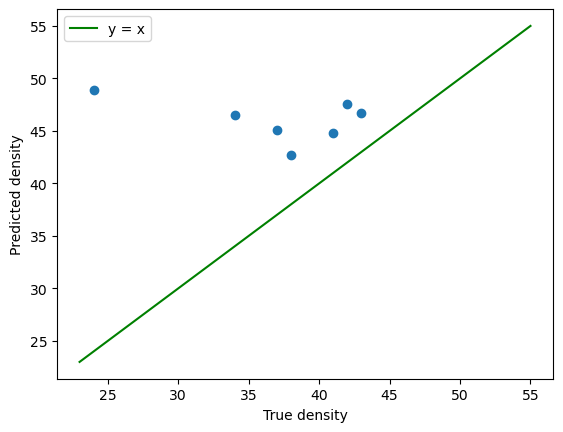

In [109]:
plt.scatter(block_0103_true_and_forecasted_values_df['True_count'], block_0103_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([23, 55], [23, 55], color='green', label='y = x')
plt.legend()
plt.show()

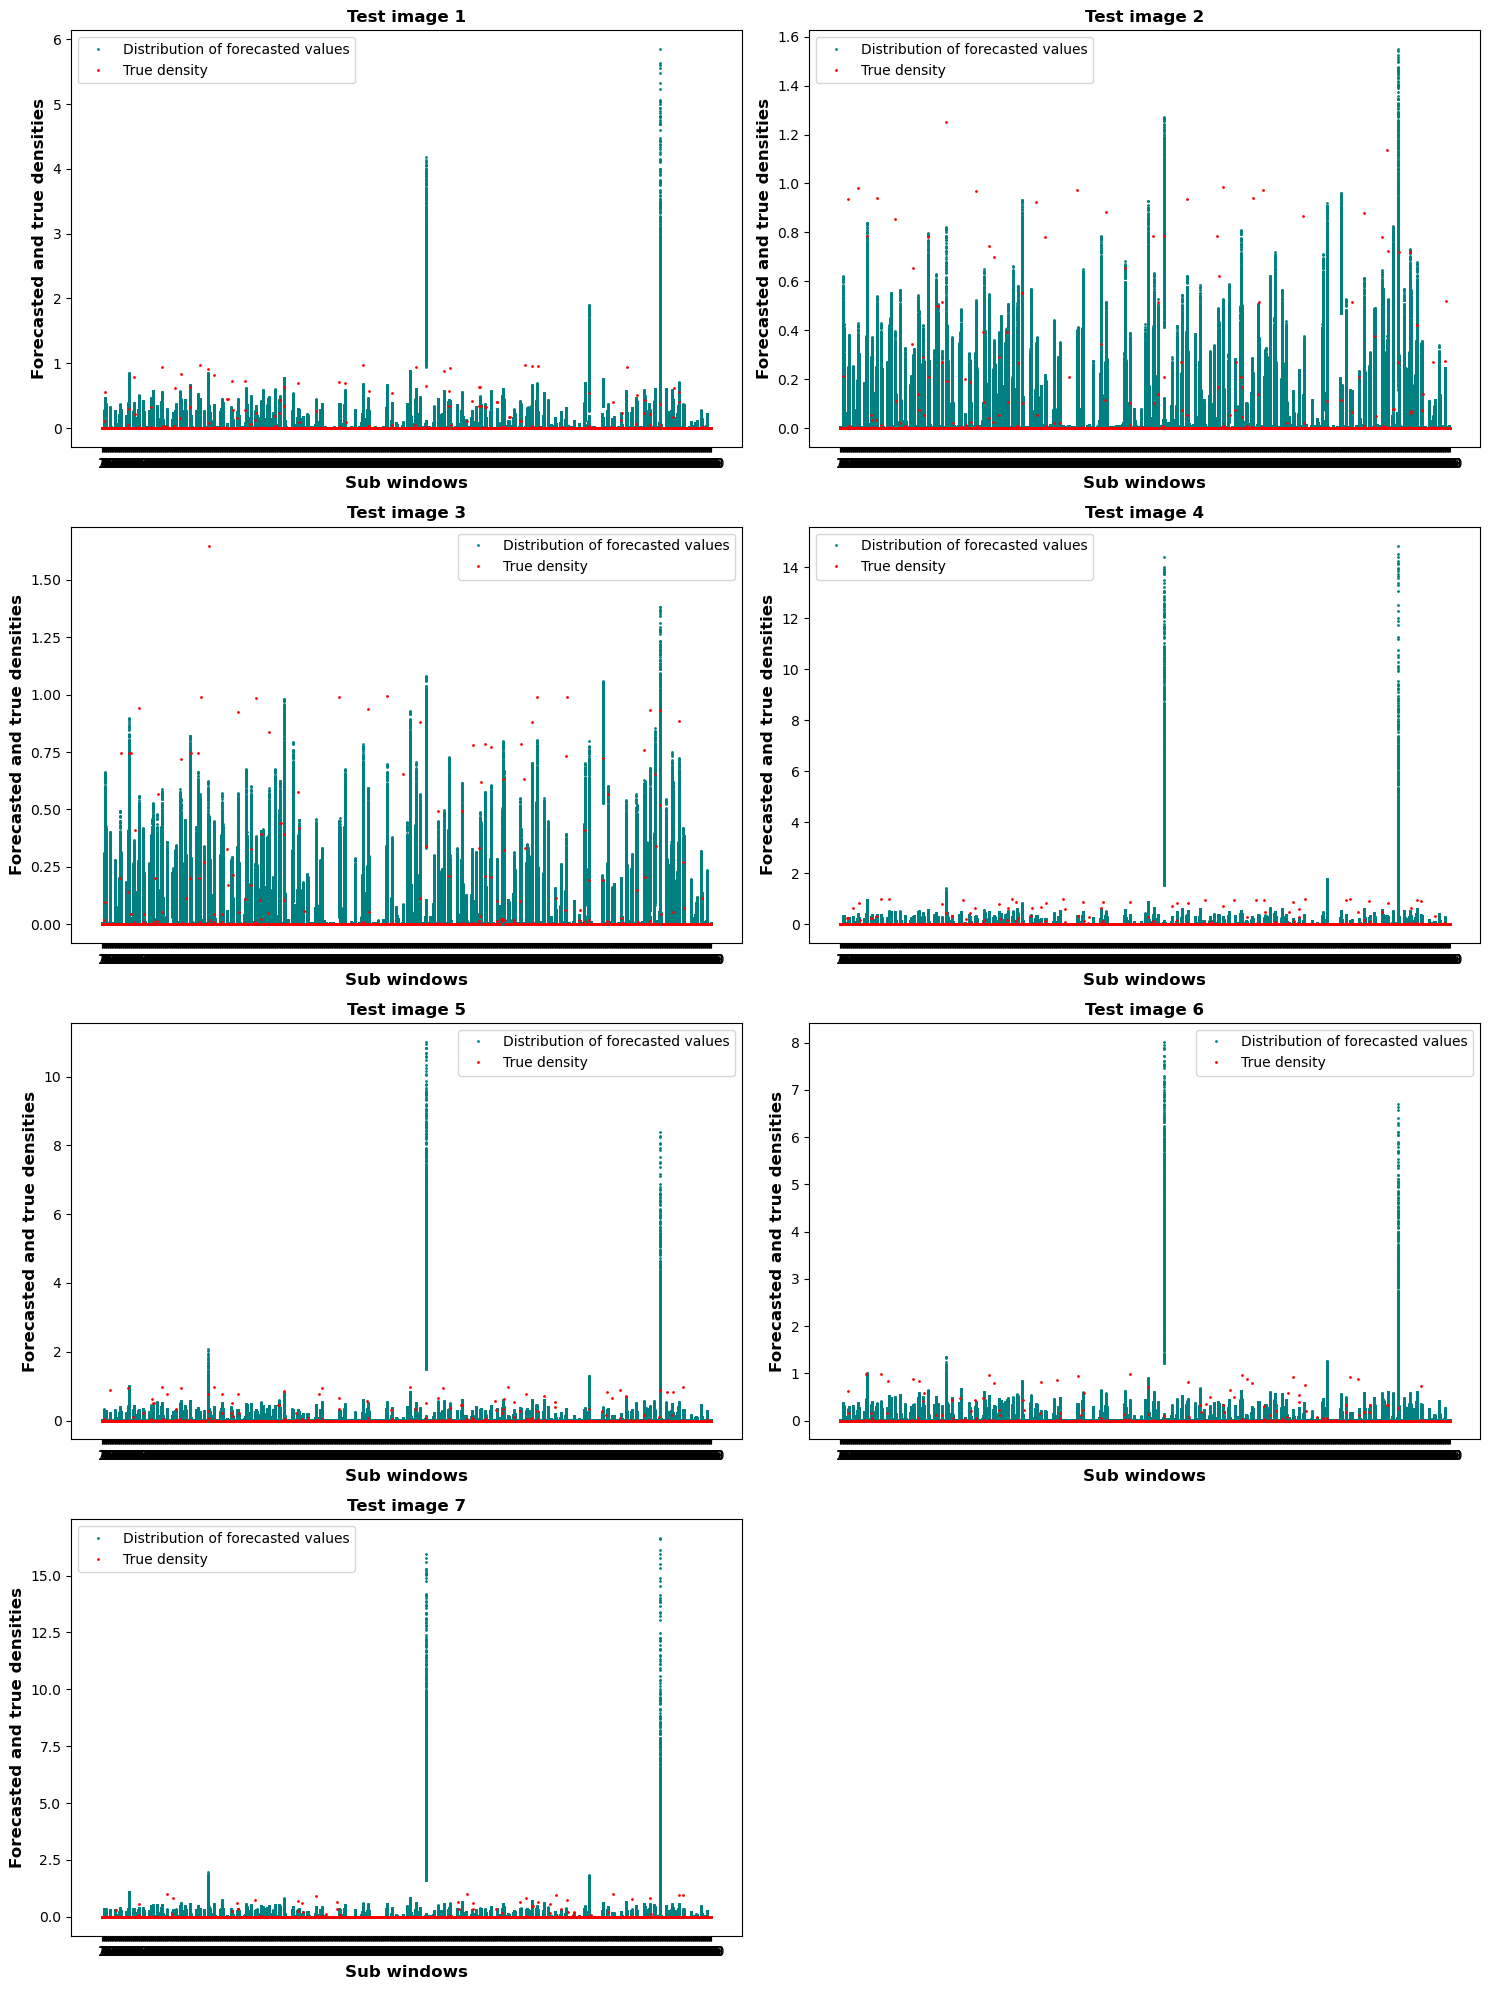

CPU times: user 26.9 s, sys: 816 ms, total: 27.7 s
Wall time: 27.4 s


In [106]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [107]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots